<a href="https://colab.research.google.com/github/alketabacka/dinewise3/blob/main/MLCOURSEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CanNo: 282550**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import csv
import os
from functools import reduce
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

**CONSUMER PRICE INDICATORS**

In [4]:
consumer_price_indicators_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv')

In [5]:
grouped_data_consumer_prediction=consumer_price_indicators_df.groupby(['Area Code (M49)','Area', 'Year'])['Value'].sum().reset_index()
grouped_data_consumer_prediction.head(5)

,Area Code (M49),Area,Year,Value
0,4,Afghanistan,2000,319.558176
1,4,Afghanistan,2001,512.090880
2,4,Afghanistan,2002,643.192895
3,4,Afghanistan,2003,651.664293
4,4,Afghanistan,2004,718.952793


In [6]:
grouped_data_consumer_prediction_filtered=grouped_data_consumer_prediction.copy()
columns_2 = {
    "Area": "area",
    "Year": "year",
    "Value": "Total value of consumer prediction per year"
}
grouped_data_consumer_prediction_filtered.rename(columns=columns_2, inplace=True)
grouped_data_consumer_prediction_filtered.head(5)

,Area Code (M49),area,year,Total value of consumer prediction per year
0,4,Afghanistan,2000,319.558176
1,4,Afghanistan,2001,512.090880
2,4,Afghanistan,2002,643.192895
3,4,Afghanistan,2003,651.664293
4,4,Afghanistan,2004,718.952793


**CROP PR0DUCTION INDICATORS**

In [7]:
crop_production_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv')

In [8]:
grouped_data_crop_production=crop_production_df.groupby(['Area Code (M49)','Area', 'Year'])['Value'].sum().reset_index()
grouped_data_crop_production.head(5)

,Area Code (M49),Area,Year,Value
0,4,Afghanistan,2000,661957
1,4,Afghanistan,2001,667714
2,4,Afghanistan,2002,672489
3,4,Afghanistan,2003,673301
4,4,Afghanistan,2004,675944


In [9]:
grouped_data_crop_production_filtered=grouped_data_crop_production.copy()
columns_3 = {
    "Area": "area",
    "Year": "year",
    "Value": "Total value of crop production per year"
}
grouped_data_crop_production_filtered.rename(columns=columns_3, inplace=True)
grouped_data_crop_production_filtered.head(5)

,Area Code (M49),area,year,Total value of crop production per year
0,4,Afghanistan,2000,661957
1,4,Afghanistan,2001,667714
2,4,Afghanistan,2002,672489
3,4,Afghanistan,2003,673301
4,4,Afghanistan,2004,675944


**EMISSIONS**

In [10]:
emissions_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Emissions - FAOSTAT_data_en_2-27-2024.csv')
emissions_df.Element.value_counts()

,count
Element,
Emissions (N2O),10260
Emissions (CO2),10260
Crops total (Emissions N2O),4228
Crops total (Emissions CH4),4162


In [11]:
emissions_df['Element']=emissions_df['Element'].replace({'Crops total (Emissions N2O)': 'Emissions (N2O)'})

In [12]:
 emission_filter_df = emissions_df[emissions_df["Element"]=="Emissions (N2O)"]
 emission_filter_df.Domain.value_counts()

,count
Domain,
Emissions from Drained organic soils,10260
Emissions from Crops,4228


In [13]:
emission_filter_df_new = emission_filter_df[emission_filter_df["Domain"]=="Emissions from Crops"]
emission_filter_df_new.Domain.value_counts()

,count
Domain,
Emissions from Crops,4228


In [14]:
column_drop_emission = ['Domain Code', 'Domain','Element Code','Element','Source','Source Code','Item Code (CPC)', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
emission_filter_df_new.drop(columns=column_drop_emission, inplace=True, errors='ignore')
emission_filter_df_new.head(5)

<ipython-input-14-369630fa0f45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emission_filter_df_new.drop(columns=column_drop_emission, inplace=True, errors='ignore')


,Area Code (M49),Area,Year,Value
0,4,Afghanistan,2000,0.7056
2,4,Afghanistan,2001,0.7054
4,4,Afghanistan,2002,1.0656
6,4,Afghanistan,2003,1.3117
8,4,Afghanistan,2004,1.0856


In [15]:
emission_filter_df_neww=emission_filter_df_new.copy()
columns_3 = {
    "Area": "area",
    "Year": "year",
    "Value": "Total value of emission (N2O) per year"
}
emission_filter_df_neww.rename(columns=columns_3, inplace=True)
emission_filter_df_neww.head(5)

,Area Code (M49),area,year,Total value of emission (N2O) per year
0,4,Afghanistan,2000,0.7056
2,4,Afghanistan,2001,0.7054
4,4,Afghanistan,2002,1.0656
6,4,Afghanistan,2003,1.3117
8,4,Afghanistan,2004,1.0856


**EMPLOYMENT**

In [16]:
employment_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Employment - FAOSTAT_data_en_2-27-2024.csv')

In [17]:
employment_filter_df =employment_df[employment_df["Indicator"]=="Employment in agriculture, forestry and fishing - ILO modelled estimates"]
employment_filter_df.head(2)

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN


In [18]:
column_drop = ['Domain Code', 'Domain','Indicator','Indicator Code','Sex','Sex Code','Element Code','Element','Source','Source Code','Item Code', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
employment_filter_df.drop(columns=column_drop, inplace=True, errors='ignore')
employment_filter_df.head(5)

<ipython-input-18-15f5f4afc60c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_filter_df.drop(columns=column_drop, inplace=True, errors='ignore')


,Area Code (M49),Area,Year,Value
2,4,Afghanistan,2000,2765.95
3,4,Afghanistan,2001,2805.54
4,4,Afghanistan,2002,2897.51
5,4,Afghanistan,2003,3093.27
6,4,Afghanistan,2004,3212.46


In [19]:
employment_filter_df_new=employment_filter_df.copy()
columns_4 = {
    "Area": "area",
    "Year": "year",
    "Value": "Total value of employment in agriculture per year"
}
employment_filter_df_new.rename(columns=columns_4, inplace=True)
employment_filter_df_new.head(5)

,Area Code (M49),area,year,Total value of employment in agriculture per year
2,4,Afghanistan,2000,2765.95
3,4,Afghanistan,2001,2805.54
4,4,Afghanistan,2002,2897.51
5,4,Afghanistan,2003,3093.27
6,4,Afghanistan,2004,3212.46


**EXCHANGE RATE**


In [20]:
exchange_rate_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Exchange rate - FAOSTAT_data_en_2-22-2024.csv')

In [21]:
exchange_average_df = exchange_rate_df.groupby(['Area Code (M49)','Area', 'Year'])['Value'].mean().reset_index()
exchange_average_df.head(5)

,Area Code (M49),Area,Year,Value
0,4,Afghanistan,1980,44.129167
1,4,Afghanistan,1981,49.479902
2,4,Afghanistan,1982,50.599608
3,4,Afghanistan,1983,50.599608
4,4,Afghanistan,1984,50.599606


In [22]:
exchange_average_df_filtered=exchange_average_df.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "average currency units per USD per year"
}
exchange_average_df_filtered.rename(columns=columns_land_use, inplace=True)
exchange_average_df_filtered.head(5)

,Area Code (M49),area,year,average currency units per USD per year
0,4,Afghanistan,1980,44.129167
1,4,Afghanistan,1981,49.479902
2,4,Afghanistan,1982,50.599608
3,4,Afghanistan,1983,50.599608
4,4,Afghanistan,1984,50.599606


**FERTILIZIES USE**

In [23]:
fertilizies_use_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv')

In [24]:
fertilizies_use_sum_df = fertilizies_use_df.groupby(['Area Code (M49)','Area', 'Year'])['Value'].sum().reset_index()
fertilizies_use_sum_df.head(5)

,Area Code (M49),Area,Year,Value
0,4,Afghanistan,2002,17900.0
1,4,Afghanistan,2003,33200.0
2,4,Afghanistan,2004,90000.0
3,4,Afghanistan,2005,20577.0
4,4,Afghanistan,2006,68253.0


In [25]:
fertilizies_use_sum_df_filtered=fertilizies_use_sum_df.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "total value of agricultural use per year"
}
fertilizies_use_sum_df_filtered.rename(columns=columns_land_use, inplace=True)
fertilizies_use_sum_df_filtered.head(5)

,Area Code (M49),area,year,total value of agricultural use per year
0,4,Afghanistan,2002,17900.0
1,4,Afghanistan,2003,33200.0
2,4,Afghanistan,2004,90000.0
3,4,Afghanistan,2005,20577.0
4,4,Afghanistan,2006,68253.0


**FOOD BALANCES INDICATOR**

In [26]:
food_balances_indicator_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv')

In [27]:
food_balances_indicator_filtered_df=food_balances_indicator_df[food_balances_indicator_df["Element"]=="Export Quantity"]
food_balances_indicator_filtered_df.head(2)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
12,FBS,Food Balances (2010-),4,Afghanistan,5911,Export Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,0.0,E,Estimated value
13,FBS,Food Balances (2010-),4,Afghanistan,5911,Export Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,0.0,E,Estimated value


In [28]:
food_balance_indicators_filtered_items_df = food_balances_indicator_filtered_df[~food_balances_indicator_filtered_df["Item"].isin(["Milk - Excluding Butter", "Eggs","Fish, Seafood","Stimulants","Meat",])]

In [29]:
export_usd_trade_food_balance = food_balance_indicators_filtered_items_df.groupby(['Area Code (M49)','Area', 'Year'])['Value'].sum().reset_index()
export_usd_trade_food_balance.head(5)

,Area Code (M49),Area,Year,Value
0,4,Afghanistan,2010,360.0
1,4,Afghanistan,2011,277.0
2,4,Afghanistan,2012,198.0
3,4,Afghanistan,2013,281.0
4,4,Afghanistan,2014,412.0


In [30]:
export_usd_trade_food_balance_new=export_usd_trade_food_balance.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "total value of export value"
}
export_usd_trade_food_balance_new.rename(columns=columns_land_use, inplace=True)
export_usd_trade_food_balance_new.head(5)

,Area Code (M49),area,year,total value of export value
0,4,Afghanistan,2010,360.0
1,4,Afghanistan,2011,277.0
2,4,Afghanistan,2012,198.0
3,4,Afghanistan,2013,281.0
4,4,Afghanistan,2014,412.0


**FOOD SECURITY INDICATORS**


In [31]:
food_security_indicators_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv')

In [32]:
food_security_df_filtered=food_security_indicators_df[food_security_indicators_df["Item"]=="Per capita food supply variability (kcal/cap/day)"]

In [33]:
column_drop = ['Domain Code', 'Domain', 'Element Code','Element','Item Code', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
food_security_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')
food_security_df_filtered.head(5)

<ipython-input-33-5e20c9e2e4c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_security_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')


,Area Code (M49),Area,Year,Value
140,4,Afghanistan,2000,58.0
141,4,Afghanistan,2001,47.0
142,4,Afghanistan,2002,71.0
143,4,Afghanistan,2003,72.0
144,4,Afghanistan,2004,50.0


In [34]:
food_security_df_filtered=food_security_df_filtered.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "total value of Per capita food supply variability (kcal/cap/day) per year"
}
food_security_df_filtered.rename(columns=columns_land_use, inplace=True)
food_security_df_filtered.head(5)

,Area Code (M49),area,year,total value of Per capita food supply variability (kcal/cap/day) per year
140,4,Afghanistan,2000,58.0
141,4,Afghanistan,2001,47.0
142,4,Afghanistan,2002,71.0
143,4,Afghanistan,2003,72.0
144,4,Afghanistan,2004,50.0


**FOOD TRADE INDICATORS**

In [35]:
food_trade_indicators_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv')

In [36]:
food_trade_df_filtered=food_trade_indicators_df[food_trade_indicators_df["Element"]=="Export Value"]
food_trade_df_filtered.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
19,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,1000 USD,15.0,A,Official figure,NaN
21,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,1000 USD,54.0,A,Official figure,NaN
23,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,1000 USD,0.0,E,Estimated value,NaN
25,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,1000 USD,0.0,E,Estimated value,NaN
27,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,1000 USD,0.0,E,Estimated value,NaN


In [37]:
food_trade_indicators_filtered_df = food_trade_df_filtered[~food_trade_df_filtered["Item"].isin(["Non-food", "Meat and Meat Preparations","Dairy Products and Eggs"])]

In [38]:
export_food_trade = food_trade_indicators_filtered_df.groupby(['Area Code (M49)','Area', 'Year'])['Value'].sum().reset_index()
export_food_trade.head(5)

,Area Code (M49),Area,Year,Value
0,4,Afghanistan,1991,53188.0
1,4,Afghanistan,1992,19812.0
2,4,Afghanistan,1993,22264.0
3,4,Afghanistan,1994,27557.0
4,4,Afghanistan,1995,24796.0


In [39]:
export_food_trade_filtered=export_food_trade.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "total value of USD export per year"
}
export_food_trade_filtered.rename(columns=columns_land_use, inplace=True)
export_food_trade_filtered.head(5)

,Area Code (M49),area,year,total value of USD export per year
0,4,Afghanistan,1991,53188.0
1,4,Afghanistan,1992,19812.0
2,4,Afghanistan,1993,22264.0
3,4,Afghanistan,1994,27557.0
4,4,Afghanistan,1995,24796.0


**FOREIGN DIRECT INVESTMENT**

In [40]:
foreign_direct_investment_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv')

In [41]:
foreign_direct_investment_df_filtered=foreign_direct_investment_df[foreign_direct_investment_df["Item"]=="Total FDI inflows"]
foreign_direct_investment_df_filtered.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [42]:
column_drop = ['Domain Code', 'Domain', 'Element Code','Element','Item Code', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
foreign_direct_investment_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')
foreign_direct_investment_df_filtered.head(5)

<ipython-input-42-10940999092e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_direct_investment_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')


,Area Code (M49),Area,Year,Value
0,4,Afghanistan,2000,0.17
1,4,Afghanistan,2001,0.68
2,4,Afghanistan,2002,50.00
3,4,Afghanistan,2003,57.80
4,4,Afghanistan,2004,186.90


In [43]:
foreign_direct_investment_df_filtered=foreign_direct_investment_df_filtered.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "value of total FDI inflows"
}
foreign_direct_investment_df_filtered.rename(columns=columns_land_use, inplace=True)
foreign_direct_investment_df_filtered.head(5)

,Area Code (M49),area,year,value of total FDI inflows
0,4,Afghanistan,2000,0.17
1,4,Afghanistan,2001,0.68
2,4,Afghanistan,2002,50.00
3,4,Afghanistan,2003,57.80
4,4,Afghanistan,2004,186.90


**LAND TEMPERATURE CHANGE**


In [44]:
land_temp_change_df=pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Land temperature change - FAOSTAT_data_en_2-27-2024.csv')

In [45]:
land_temp_change_df_filtered=land_temp_change_df[land_temp_change_df["Element"]=="Temperature change"]
land_temp_change_df_filtered.head(2)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value


In [46]:
average_temperatures_df = land_temp_change_df_filtered.groupby(['Area','Area Code (M49)', 'Year'])['Value'].mean().reset_index()
average_temperatures_df.head(5)

,Area,Area Code (M49),Year,Value
0,Afghanistan,4,2000,0.9930
1,Afghanistan,4,2001,1.3110
2,Afghanistan,4,2002,1.3650
3,Afghanistan,4,2003,0.5870
4,Afghanistan,4,2004,1.3732


In [47]:
average_temperatures_df_filtered =average_temperatures_df.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "average value of temp per year"
}
average_temperatures_df_filtered.rename(columns=columns_land_use, inplace=True)
average_temperatures_df_filtered.head(5)

,area,Area Code (M49),year,average value of temp per year
0,Afghanistan,4,2000,0.9930
1,Afghanistan,4,2001,1.3110
2,Afghanistan,4,2002,1.3650
3,Afghanistan,4,2003,0.5870
4,Afghanistan,4,2004,1.3732


**LAND** **USE**


In [48]:
land_use_df = pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Land use - FAOSTAT_data_en_2-22-2024.csv')


<ipython-input-48-feb98daab4a6>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  land_use_df = pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Land use - FAOSTAT_data_en_2-22-2024.csv')


In [49]:
land_use_df_filtered=land_use_df[land_use_df["Item"]=="Cropland"]

In [50]:
column_drop = ['Domain Code', 'Domain', 'Element Code','Element','Item Code', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
land_use_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')
land_use_df_filtered.head(5)

<ipython-input-50-54b5a15cf436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_use_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')


,Area Code (M49),Area,Year,Value
168,4,Afghanistan,1980,8049.0
169,4,Afghanistan,1981,8053.0
170,4,Afghanistan,1982,8054.0
171,4,Afghanistan,1983,8054.0
172,4,Afghanistan,1984,8054.0


In [51]:
land_use_df_filtered=land_use_df_filtered.copy()
columns_land_use = {
    "Area": "area",
    "Year": "year",
    "Value": "total value of land use"
}
land_use_df_filtered.rename(columns=columns_land_use, inplace=True)
land_use_df_filtered.head(5)

,Area Code (M49),area,year,total value of land use
168,4,Afghanistan,1980,8049.0
169,4,Afghanistan,1981,8053.0
170,4,Afghanistan,1982,8054.0
171,4,Afghanistan,1983,8054.0
172,4,Afghanistan,1984,8054.0


**PESTICIDES** **USE**


In [52]:
Pesticides_use_df = pd.read_csv('/content/drive/My Drive/ML Coursework Dataset/Pesticides use - FAOSTAT_data_en_2-27-2024.csv')
pesticides_df_filtered=Pesticides_use_df[Pesticides_use_df["Element"]=="Use per area of cropland"]
pesticides_df_filtered.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN
7,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2002,2002,kg/ha,0.47,E,Estimated value,NaN
10,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2003,2003,kg/ha,0.49,E,Estimated value,NaN
13,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2004,2004,kg/ha,0.51,E,Estimated value,NaN


In [53]:
column_drop = ['Domain Code', 'Domain', 'Element Code','Element','Item Code', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
pesticides_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')
pesticides_df_filtered.head(5)

<ipython-input-53-37c5bac74b55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pesticides_df_filtered.drop(columns=column_drop, inplace=True, errors='ignore')


,Area Code (M49),Area,Year,Value
1,8,Albania,2000,0.44
4,8,Albania,2001,0.46
7,8,Albania,2002,0.47
10,8,Albania,2003,0.49
13,8,Albania,2004,0.51


In [54]:
pesticides_df_filtered=pesticides_df_filtered.copy()
columns_pesticidies = {
    "Area": "area",
    "Year": "year",
    "Value": "total value of pesticidies"
}
pesticides_df_filtered.rename(columns=columns_pesticidies, inplace=True)
pesticides_df_filtered.head(5)

,Area Code (M49),area,year,total value of pesticidies
1,8,Albania,2000,0.44
4,8,Albania,2001,0.46
7,8,Albania,2002,0.47
10,8,Albania,2003,0.49
13,8,Albania,2004,0.51


In [55]:
dfs = [land_use_df_filtered,pesticides_df_filtered,average_temperatures_df_filtered, foreign_direct_investment_df_filtered,food_security_df_filtered,export_food_trade_filtered,
       export_usd_trade_food_balance_new,fertilizies_use_sum_df_filtered,exchange_average_df_filtered,employment_filter_df_new,grouped_data_consumer_prediction_filtered,grouped_data_crop_production_filtered
       ,emission_filter_df_neww]
#food_security_df_filtered
for dataframe in dfs:
    dataframe['area'] = dataframe['area'].astype(str)
    dataframe['Area Code (M49)'] = dataframe['Area Code (M49)'].astype(int)
    dataframe['year'] = dataframe['year'].astype(int)
# reduce to merge all DataFrames on 'area' and 'year' with an outer join
all_merged = reduce(lambda left, right: pd.merge(left, right, on=['Area Code (M49)','area', 'year'], how='outer'), dfs)

all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 16 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Area Code (M49)                                                            10323 non-null  int64  
 1   area                                                                       10323 non-null  object 
 2   year                                                                       10323 non-null  int64  
 3   total value of land use                                                    9086 non-null   float64
 4   total value of pesticidies                                                 4075 non-null   float64
 5   average value of temp per year                                             5268 non-null   float64
 6   value of total FDI inflows                            

In [56]:
# Create a copy of the DataFrame
all_merged_copy = all_merged.copy()

# Drop rows where 'total amount of usd export value' column has missing values
all_merged_copy = all_merged_copy.dropna(subset=['total value of USD export per year'])

# Display the first 2 rows of the cleaned DataFrame
all_merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6180 entries, 11 to 9773
Data columns (total 16 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Area Code (M49)                                                            6180 non-null   int64  
 1   area                                                                       6180 non-null   object 
 2   year                                                                       6180 non-null   int64  
 3   total value of land use                                                    5953 non-null   float64
 4   total value of pesticidies                                                 3886 non-null   float64
 5   average value of temp per year                                             4364 non-null   float64
 6   value of total FDI inflows                                  

**PREPROCESSING**


In [57]:
# Initialize the KNN Imputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Identify numeric columns in the dataframe
numeric_columns = all_merged_copy.select_dtypes(include=['float64', 'int64']).columns

# Apply the imputer to the numeric columns
all_merged_copy[numeric_columns] = imputer.fit_transform(all_merged_copy[numeric_columns])

# Display the first few rows of the dataframe to inspect the imputed values
all_merged_copy.head()

# Check for any remaining missing values in the dataframe
all_merged_copy.isnull().sum()

# Display the dataframe's information, such as datatype and non-null count for each column
all_merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6180 entries, 11 to 9773
Data columns (total 16 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Area Code (M49)                                                            6180 non-null   float64
 1   area                                                                       6180 non-null   object 
 2   year                                                                       6180 non-null   float64
 3   total value of land use                                                    6180 non-null   float64
 4   total value of pesticidies                                                 6180 non-null   float64
 5   average value of temp per year                                             6180 non-null   float64
 6   value of total FDI inflows                                  

In [58]:
# Assuming 'df' is your DataFrame and 'column' is the column you want to Winsorize
def drop_outliers(df, column):
    # Calculate quartiles
    Q1 = all_merged_copy[column].quantile(0.25)
    Q3 = all_merged_copy[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Drop outliers
    dataf_clean = all_merged_copy[(all_merged_copy[column] >= lower_bound) & (df[column] <= upper_bound)]

    return dataf_clean

dataf_clean=drop_outliers(all_merged_copy, 'total value of USD export per year')

In [59]:
dataf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5249 entries, 11 to 9773
Data columns (total 16 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Area Code (M49)                                                            5249 non-null   float64
 1   area                                                                       5249 non-null   object 
 2   year                                                                       5249 non-null   float64
 3   total value of land use                                                    5249 non-null   float64
 4   total value of pesticidies                                                 5249 non-null   float64
 5   average value of temp per year                                             5249 non-null   float64
 6   value of total FDI inflows                                  

In [60]:
# Create a copy of the DataFrame to shift the years by 3
df_shifted = dataf_clean.copy()
df_shifted['year'] = df_shifted['year'] - 3  # Shift years back by 3

# Merge the original DataFrame with the shifted one and rename the column
df_final = pd.merge(
    dataf_clean,
    df_shifted[['area', 'year', 'total value of USD export per year']],
    on=['area', 'year'],
    how='left'
)

# Rename the new column to 'predicted_export'
df_final.rename(columns={'total value of USD export per year': 'total value of USD export per year_y'}, inplace=True)

# Display the new DataFrame with the new column
df_final.head()

,Area Code (M49),area,year,total value of land use,total value of pesticidies,average value of temp per year,value of total FDI inflows,total value of Per capita food supply variability (kcal/cap/day) per year,total value of USD export per year_x,total value of export value,total value of agricultural use per year,average currency units per USD per year,Total value of employment in agriculture per year,Total value of consumer prediction per year,Total value of crop production per year,Total value of emission (N2O) per year,total value of USD export per year_y
0,4.0,Afghanistan,1991.0,8030.0,0.226,0.82324,793.775074,40.8,53188.0,60.2,697515.800,50.599605,6857.946,1032.178706,788078.0,2.86178,27557.0
1,4.0,Afghanistan,1992.0,8030.0,0.186,0.54316,207.550798,94.6,19812.0,12.6,94576.318,50.599605,2002.256,1177.369080,938860.0,2.72038,24796.0
2,4.0,Afghanistan,1993.0,7934.0,0.214,0.96176,377.936919,30.8,22264.0,13.0,94734.918,50.599605,5703.082,1072.905897,607205.0,2.71212,41473.0
3,4.0,Afghanistan,1994.0,7813.0,0.248,0.82692,552.931424,21.2,27557.0,19.4,661490.000,425.099934,11280.926,1439.226041,731367.8,2.61226,45971.0
4,4.0,Afghanistan,1995.0,7763.0,0.302,1.12548,472.194788,23.8,24796.0,19.6,733893.800,833.333333,6405.168,618.906805,731635.0,4.65374,48269.0


In [61]:
df_final = df_final[df_final['total value of USD export per year_y'].notna()]

In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4675 entries, 0 to 5248
Data columns (total 17 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Area Code (M49)                                                            4675 non-null   float64
 1   area                                                                       4675 non-null   object 
 2   year                                                                       4675 non-null   float64
 3   total value of land use                                                    4675 non-null   float64
 4   total value of pesticidies                                                 4675 non-null   float64
 5   average value of temp per year                                             4675 non-null   float64
 6   value of total FDI inflows                                   

## **Feature selecting**

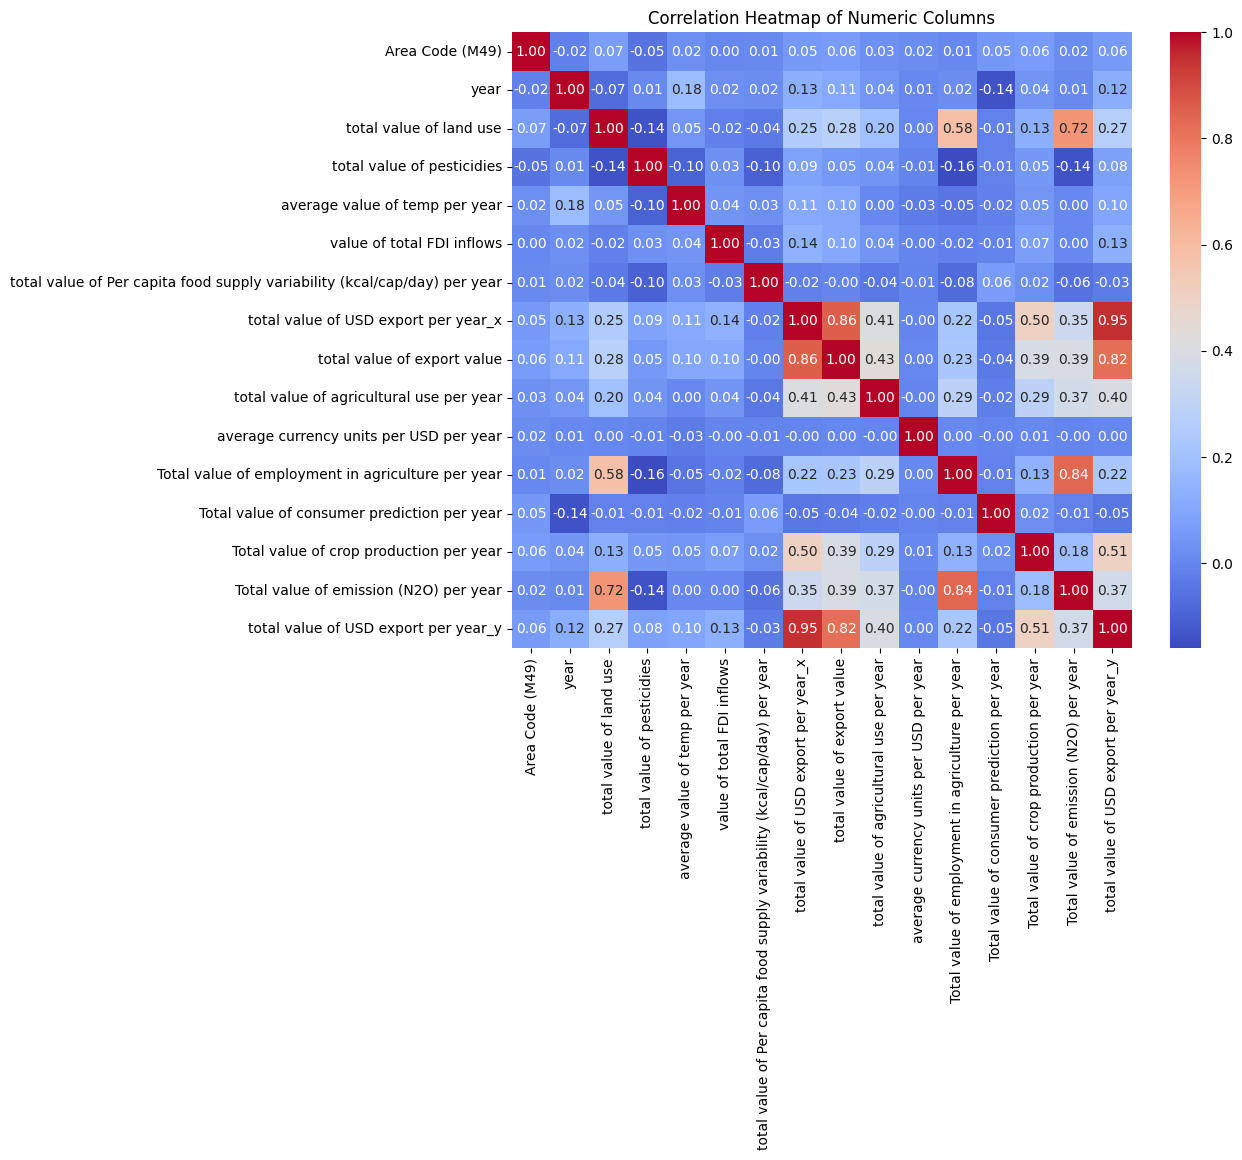

In [63]:
# Exclude 'area' column and any non-numeric columns
selected_columns = [col for col in df_final.columns if col != 'area' and df_final[col].dtype in [np.float64, np.int64]]
df_selected = df_final[selected_columns]

# Recalculate the correlation matrix for the selected dataframe
correlation_matrix_selected = df_selected.corr()

# Generate a heatmap for the selected dataframe
plt.figure(figsize=(10, 8))
sns_heatmap = sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


In [64]:
# Ignore the first entry since it will be 'predicted_export' itself with a correlation of 1
top_6_features_selected = correlation_matrix_selected['total value of USD export per year_y'].sort_values(key=abs, ascending=False)[1:7]

# Display the top 6 features with their correlation scores
print("Top 6 correlated features with 'predicted_export':")
print(top_6_features_selected)

Top 6 correlated features with 'predicted_export':
total value of USD export per year_x        0.946643
total value of export value                 0.822713
Total value of crop production per year     0.505261
total value of agricultural use per year    0.397387
Total value of emission (N2O) per year      0.367972
total value of land use                     0.266955
Name: total value of USD export per year_y, dtype: float64


**SELECT, VALIDATE AND TEST**

In [65]:
# Assuming df_cleaned is your DataFrame
top_features_names = [
    'total value of USD export per year_x', 'total value of export value', 'total value of agricultural use per year',
    'Total value of crop production per year', 'total value of land use', 'Total value of emission (N2O) per year',
    'Area Code (M49)', 'year'
]

top_features_target = ['total value of USD export per year_y']

features = df_final[top_features_names]
target = df_final[top_features_target]

# Splitting the data into train, validation, and test sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=1
)
train_features, val_features, train_target, val_target = train_test_split(
    train_features, train_target, test_size=0.125, random_state=1  # This results in 0.1 of the original data
)

# Add 'year_area' to val_features before scaling
val_features['year_area'] = val_features['year'].astype(str) + "_" + val_features['Area Code (M49)'].astype(str)

# Store 'year_area' and 'total value of USD export per year' before scaling
val_features_with_area = val_features[['year_area', 'total value of USD export per year_x']].copy()

# Remove 'year_area' from features before scaling
val_features = val_features.drop(columns=['year_area'])

# Create a scaler for features only
scaler_features = StandardScaler()

# Scale the features
scaled_train_features = scaler_features.fit_transform(train_features)
scaled_val_features = scaler_features.transform(val_features)
scaled_test_features = scaler_features.transform(test_features)

# Define the MLP model using TensorFlow Keras with L2 regularization
alpha = 0.01  # Regularization strength

model = Sequential([
    Dense(150, activation='relu', input_shape=(scaled_train_features.shape[1],), kernel_regularizer=l2(alpha)),
    Dense(100, activation='relu', kernel_regularizer=l2(alpha)),
    Dense(50, activation='relu', kernel_regularizer=l2(alpha)),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Training
history = model.fit(
    scaled_train_features, train_target,
    validation_data=(scaled_val_features, val_target),
    epochs=2500,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Prediction on validation features
val_predictions = model.predict(scaled_val_features).flatten()

# Clip predictions to ensure no negative values
val_predictions = np.clip(val_predictions, a_min=0, a_max=None)

# Calculating metrics
mse = mean_squared_error(val_target, val_predictions)
r2 = r2_score(val_target, val_predictions)
rmse = np.sqrt(mse)

# Print the metrics
print(f"MSE: {mse}, R^2: {r2}, RMSE: {rmse}")

# Create the DataFrame for the predictions
predictions_df = pd.DataFrame({
    'year_area': val_features_with_area['year_area'],  # Use the stored 'year_area' from val_features_with_area
    'total value of USD export per year_x': val_features_with_area['total value of USD export per year_x'],
    'total value of USD export per year_y': val_predictions
})

# Save the DataFrame to a CSV file
predictions_path = '/content/drive/My Drive/ML Coursework Dataset/predicted_exports.csv'
predictions_df.to_csv(predictions_path, index=False)


Epoch 1/2500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1463151362048.0000 - val_loss: 1683110232064.0000
Epoch 2/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1492272283648.0000 - val_loss: 1648471572480.0000
Epoch 3/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1404395585536.0000 - val_loss: 1441494859776.0000
Epoch 4/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1160434679808.0000 - val_loss: 924502130688.0000
Epoch 5/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 696145477632.0000 - val_loss: 436348452864.0000
Epoch 6/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 351198085120.0000 - val_loss: 299600609280.0000
Epoch 7/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 300352700416.0000 - val_loss: 261842829312.0000
Epoch 8/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252900212736.0000 - val_loss: 240044900352.0000
Epoch 9/2500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231447396352.0000 - val_loss: 223844876288.0000
Epoch 10/2500
10